In [17]:
import sys
sys.path.append('..')
from data_visualisation import TSNE_2D_analysis
from tools import data_parser as dp
from tools.feature_selection import feat_select
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import joblib
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats

In [13]:
light,heavy,source,names = dp.data_extract_abY('../data/abYsis_data.csv')
data_60 = "../data/combined_datasets_60.csv"
abysis_berty = '../data/abYsis_bert_df.csv'
abysis_berty_df = pd.read_csv(abysis_berty)

In [6]:
data_60 = pd.read_csv('../data/combined_datasets_60.csv')

def select_columns(X):

    selected_features = data_60.columns
    X.columns = ['{}'.format(i) for i in range(len(X.columns))]
    X_new = X[selected_features]
    X_new.columns = ['{}'.format(i) for i in range(len(X_new.columns))]
    return X_new

abY_bert_reduced_df_60 = select_columns(abysis_berty_df)

In [8]:
abY_bert_reduced_df_60

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,150.734760,-1.429909,170.814090,-54.63051,133.352860,-88.657120,-47.829390,71.067980,-13.858795,-154.085770,...,-11.763147,-9.972216,18.321579,-25.560791,105.381780,14.021048,-6.854883,-89.506355,0.398846,46.869390
1,212.380660,-41.452564,33.066370,-219.01161,36.982685,68.422630,27.771410,90.319610,-55.325794,-130.201170,...,-31.924635,4.472650,19.171612,-35.572582,-86.679660,-70.118270,81.915825,-60.748257,-30.992832,114.938220
2,254.164200,-118.831610,66.687030,-176.23546,-2.161565,149.221120,-27.051546,96.019585,-86.548630,-10.311674,...,5.677790,-54.326897,17.858932,-49.773820,-24.667833,-46.848980,118.371180,-84.439926,3.346790,55.376270
3,173.167800,-48.315350,97.459040,-145.62514,49.150055,92.455124,105.444534,230.652730,-150.753750,-48.875900,...,78.385510,-180.512770,-62.740580,-14.722496,-9.595967,-34.280030,4.480755,9.123018,61.714380,185.749730
4,109.009575,-67.968480,106.013280,-177.81998,35.180610,66.418510,-46.441105,211.119810,5.764803,-28.688555,...,-97.193695,-53.277664,-33.357040,-57.070656,46.541520,42.469265,14.247761,-55.692833,-55.562237,95.312680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4394,143.607420,-81.559830,178.940640,-119.54585,98.028206,32.871650,-91.955025,88.570274,-69.227806,-228.294850,...,-17.592072,53.438477,38.914530,-29.263180,60.935604,-2.051566,-37.851665,-39.411730,-27.461903,130.789300
4395,144.681210,-103.723274,147.155650,-74.06608,104.314810,51.151367,-152.875640,129.490590,-79.388670,-138.904630,...,-19.210241,16.746685,42.693220,-23.806911,50.123146,-54.215378,-52.396767,-61.970085,-100.716530,101.362040
4396,46.733820,163.200880,24.497725,-107.45423,-62.836906,-5.433272,156.995940,67.626500,-152.132950,-126.367110,...,-136.248660,8.110908,-248.088380,79.813290,2.206072,-95.895380,-78.490440,26.465733,190.705780,212.826520
4397,57.689224,-15.253461,-18.027767,68.78354,-41.878050,-91.460370,91.483010,23.596130,-4.072263,-82.676620,...,-15.988316,-130.689100,-50.171696,-16.335094,-7.964562,-12.055811,-35.008884,-69.638300,-116.496440,-21.481022


In [7]:
TSNE_2D_analysis.plot2d(abY_bert_reduced_df_60,source)

TypeError: argument of type 'method' is not iterable

In [14]:
def plot2d(data, source, dims=2, perpx=100):

    Array2d = data.to_numpy()

    X_embedded = TSNE(n_components=dims, learning_rate='auto',
                      init='random', perplexity=perpx).fit_transform(Array2d)

    dataset = pd.DataFrame({'Column1': X_embedded[:, 0], 'Column2': X_embedded[:, 1]})

    dataset['source'] = source

    sns.set_style("whitegrid", {'axes.grid' : False})

    tsne_plot = sns.lmplot(x="Column1", y="Column2", data=dataset, fit_reg=False, hue='source', legend=False,
                           scatter_kws={"s": 10, 'alpha': 0.5})
    plt.legend(loc='lower right')
    plt.show()

    return tsne_plot.figure.savefig("TSNE_60_feat_abY_plot_per50.png", bbox_inches='tight')

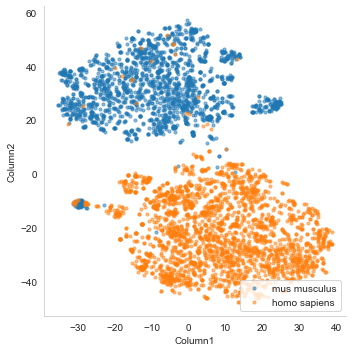

In [15]:
plot2d(abY_bert_reduced_df_60,source)

In [18]:
model_gbt = joblib.load("../models/05062023_gb_60.joblib")

In [19]:
bert_data_512 = "../data/combined_bert_df.csv"
bert_data_60 = "../data/combined_datasets_60.csv"
df = pd.read_csv(bert_data_60)

light, heavy, temp = dp.data_extract('../data/combined_datasets.csv')

X = df
y = temp

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=13)

C:\Users\toon_\.virtualenvs\AntibodyFvTm50Predictor\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 116
- 128
- 134
- 138
- 152
- ...
Feature names seen at fit time, yet now missing:
- 0
- 1
- 10
- 11
- 12
- ...

  warnings.warn(message, FutureWarning)
C:\Users\toon_\.virtualenvs\AntibodyFvTm50Predictor\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 116
- 128
- 134
- 138
- 152
- ...
Feature names seen at fit time, yet now missing:
- 0
- 1
- 10
- 11
- 12
- ...

  warnings.warn(message, FutureWarning)
C:\Users\toon_\.virtualenvs\AntibodyFvTm50Predictor\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting ver

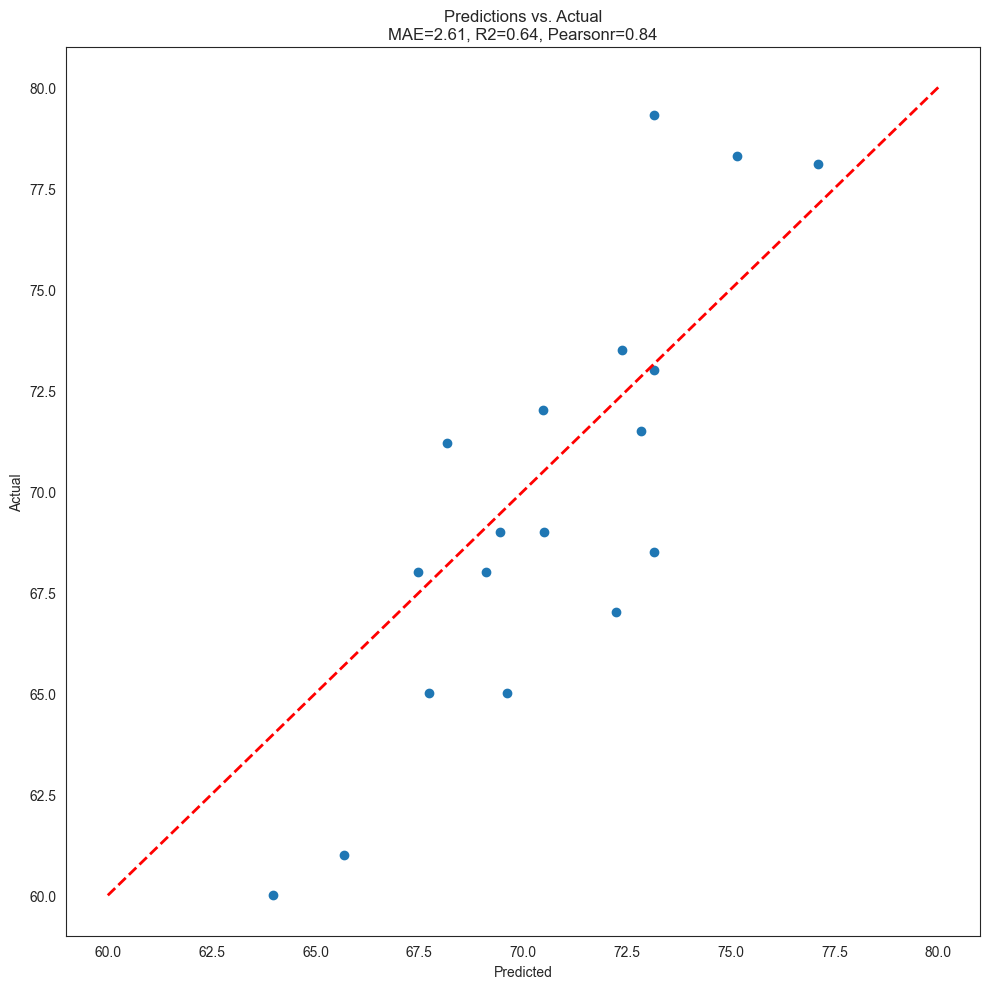

In [24]:
mse = mean_squared_error(y_test, model_gbt.predict(X_test))
mae = mean_absolute_error(y_test, model_gbt.predict(X_test))
pearsonr = stats.pearsonr(y_test, model_gbt.predict(X_test))
r2 = r2_score(y_test, model_gbt.predict(X_test))

# plot actual vs predicted
sns.set_style(style='white')
fig = plt.figure(figsize=(10, 10))
plt.subplot(1, 1, 1)
plt.scatter(model_gbt.predict(X_test),y_test)
plt.plot([60,80], [60,80], 'r--', lw=2)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title(f'Predictions vs. Actual\nMAE={mae:.2f}, R2={r2:.2f}, Pearsonr={pearsonr[0]:.2f}')
fig.tight_layout()
plt.show()

In [25]:
model_gbt

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=5000)

In [26]:
model_rf = joblib.load("../models/05062023_rf_60.joblib")

model_svm = joblib.load("../models/05062023_svm_60.joblib")

In [29]:
model_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [31]:
model_svm.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

model_gbt.get_params()

In [33]:
model_gbt.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 5000,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}